# 6.2 Exploring relationships

This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
4. Correlations
5. Scatterplots
6. Pair Plots
7. Categorical Plots

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# checking version
matplotlib.__version__

'3.4.3'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Setting path to data
path = r'C:\Users\Anwender\Desktop\ballfifa20'

In [5]:
# Import data

df_ball = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean20_fifa_play.csv'), index_col = False)

In [6]:
# Showing the head
df_ball.head()

,Unnamed: 0,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,...,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,...,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,...,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,...,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,...,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,...,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


In [7]:
# Showing the dataframe dimensions 
df_ball.shape

(18038, 35)

In [8]:
# checking titles of column
df_ball.columns

Index(['Unnamed: 0', 'ID', 'short_name', 'long_name', 'age', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'team_position', 'joined', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'power_shot_power',
       'power_jumping', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_penalties'],
      dtype='object')

In [9]:
# Checking df_fifa20_clean
df_ball.isnull().sum()

Unnamed: 0                     0
ID                             0
short_name                     0
long_name                      0
age                            0
height_cm                      0
weight_kg                      0
nationality                    0
club                           0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
preferred_foot                 0
international_reputation       0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
release_clause_eur             0
team_position                  0
joined                      1048
contract_valid_until           0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
power_shot_power               0
power_jump

In [10]:
# Not needed for this analysis
df_ball.drop(['joined'], axis=1, inplace=True)

In [11]:
# to see all columns
pd.set_option('display.max_columns', None)

In [12]:
# Showing the head
df_ball.head()

,Unnamed: 0,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Lean,195800000.0,RW,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,Normal,96500000.0,LW,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Lean,195200000.0,CAM,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,184500000.0,LW,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


In [13]:
# droping Unnamed column
df_fifabal = df_ball.loc[:,~df_ball.columns.str.contains('^Unnamed')]

In [14]:
# Showing the head
df_fifabal.head()

,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Lean,195800000.0,RW,2021.0,87.000000,92.0,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,Normal,96500000.0,LW,2022.0,90.000000,93.0,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Lean,195200000.0,CAM,2022.0,91.000000,85.0,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,2023.0,67.702219,52.0,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,184500000.0,LW,2024.0,91.000000,83.0,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


In [15]:
# Checking clean dataframe
df_fifabal.isnull().sum()

ID                          0
short_name                  0
long_name                   0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
release_clause_eur          0
team_position               0
contract_valid_until        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
power_shot_power            0
power_jumping               0
power_long_shots            0
mentality_aggression        0
mentality_interceptions     0
mentality_penalties         0
dtype: int

In [16]:
# getting the info
df_fifabal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18038 entries, 0 to 18037
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18038 non-null  int64  
 1   short_name                18038 non-null  object 
 2   long_name                 18038 non-null  object 
 3   age                       18038 non-null  int64  
 4   height_cm                 18038 non-null  int64  
 5   weight_kg                 18038 non-null  int64  
 6   nationality               18038 non-null  object 
 7   club                      18038 non-null  object 
 8   overall                   18038 non-null  int64  
 9   potential                 18038 non-null  int64  
 10  value_eur                 18038 non-null  int64  
 11  wage_eur                  18038 non-null  int64  
 12  preferred_foot            18038 non-null  object 
 13  international_reputation  18038 non-null  int64  
 14  weak_f

In [17]:
# Checking df_game for mixed type columns
for col in df_fifabal.columns.tolist():
  weird = (df_fifabal[[col]].applymap(type) != df_fifabal[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_fifabal[weird]) > 0:
    print (col)
    print (col + ' has mixed type data')
  else:
    print (col + ' data type is uniform')

ID data type is uniform
short_name data type is uniform
long_name data type is uniform
age data type is uniform
height_cm data type is uniform
weight_kg data type is uniform
nationality data type is uniform
club data type is uniform
overall data type is uniform
potential data type is uniform
value_eur data type is uniform
wage_eur data type is uniform
preferred_foot data type is uniform
international_reputation data type is uniform
weak_foot data type is uniform
skill_moves data type is uniform
work_rate data type is uniform
body_type data type is uniform
release_clause_eur data type is uniform
team_position data type is uniform
contract_valid_until data type is uniform
pace data type is uniform
shooting data type is uniform
passing data type is uniform
dribbling data type is uniform
defending data type is uniform
physic data type is uniform
power_shot_power data type is uniform
power_jumping data type is uniform
power_long_shots data type is uniform
mentality_aggression data type is u

# 2. Creating a Correlation Matrix Heatmap

In [18]:
# Creating a correlation matrix
df_fifabal.corr()

,ID,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
ID,1.000000,-0.747596,-0.091743,-0.203531,-0.449106,0.044295,-0.159888,-0.228660,-0.360339,-0.091486,-0.079225,-0.140064,0.144401,0.145787,-0.247071,-0.332966,-0.201235,-0.205256,-0.335729,-0.284948,-0.190904,-0.178590,-0.234324,-0.166676,-0.147255
age,-0.747596,1.000000,0.081197,0.237195,0.464739,-0.263608,0.087040,0.157250,0.260505,0.073954,0.045573,0.064196,-0.122691,-0.185665,0.220012,0.304387,0.149918,0.240184,0.401778,0.263774,0.187390,0.162674,0.261982,0.197581,0.141377
height_cm,-0.091743,0.081197,1.000000,0.768449,0.039278,-0.003037,0.009628,0.019729,0.036937,-0.175620,-0.430058,0.010607,-0.013972,-0.389000,-0.187054,-0.261905,-0.372671,0.196577,0.441479,-0.174929,-0.041925,-0.383687,-0.044790,-0.050997,-0.336583
weight_kg,-0.203531,0.237195,0.768449,1.000000,0.155818,-0.012494,0.052950,0.067215,0.090443,-0.129048,-0.352307,0.046764,-0.027106,-0.346040,-0.088523,-0.163374,-0.268733,0.196238,0.520748,-0.056278,0.030792,-0.279039,0.030705,-0.027384,-0.247508
overall,-0.449106,0.464739,0.039278,0.155818,1.000000,0.645782,0.645414,0.580275,0.478166,0.229279,0.402908,0.618435,0.154458,0.146797,0.463295,0.635628,0.559466,0.312060,0.480961,0.569194,0.269389,0.427040,0.401298,0.317443,0.348960
potential,0.044295,-0.263608,-0.003037,-0.012494,0.645782,1.000000,0.584429,0.478279,0.343019,0.170661,0.329107,0.578748,0.247839,0.213650,0.284032,0.396572,0.421608,0.142129,0.137953,0.348498,0.110610,0.264295,0.178984,0.152675,0.224833
value_eur,-0.159888,0.087040,0.009628,0.052950,0.645414,0.584429,1.000000,0.857679,0.623063,0.171219,0.306227,0.981330,0.200584,0.164523,0.331711,0.431697,0.411352,0.153097,0.228276,0.359558,0.133033,0.280329,0.202383,0.158514,0.237370
wage_eur,-0.228660,0.157250,0.019729,0.067215,0.580275,0.478279,0.857679,1.000000,0.657242,0.151376,0.265300,0.844466,0.145933,0.110141,0.294200,0.393149,0.360631,0.162174,0.217817,0.327237,0.134626,0.253450,0.206749,0.165963,0.224570
international_reputation,-0.360339,0.260505,0.036937,0.090443,0.478166,0.343019,0.623063,0.657242,1.000000,0.127388,0.199950,0.596113,0.038571,0.006162,0.260585,0.339008,0.283186,0.133703,0.167480,0.288286,0.118270,0.208255,0.173797,0.127292,0.212639
weak_foot,-0.091486,0.073954,-0.175620,-0.129048,0.229279,0.170661,0.171219,0.151376,0.127388,1.000000,0.342682,0.162580,0.030047,0.134221,0.289741,0.254134,0.279856,-0.095233,0.000072,0.310644,0.073310,0.369269,0.144738,0.059504,0.342573


# 3. Creating a correlation heatmap using seaborn

In [24]:
df_fifabal.columns

Index(['ID', 'short_name', 'long_name', 'age', 'height_cm', 'weight_kg',
       'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'team_position', 'contract_valid_until', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'power_shot_power', 'power_jumping',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_penalties'],
      dtype='object')

In [25]:
# Create a subset excluding the "Date" and "No" columns

sub_2 = df_fifabal[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation','release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

In [26]:
sub_2

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
0,32,170,72,94,94,95500000,565000,5,1.958000e+08,87.000000,92.0,92.000000,96.00000,39.000000,66.000000
1,34,187,83,93,93,58500000,405000,5,9.650000e+07,90.000000,93.0,82.000000,89.00000,35.000000,78.000000
2,27,175,68,92,92,105500000,290000,5,1.952000e+08,91.000000,85.0,87.000000,95.00000,32.000000,58.000000
3,26,188,87,91,93,77500000,125000,3,1.647000e+08,67.702219,52.0,57.206209,62.52562,51.506795,64.850767
4,28,175,74,91,91,90000000,470000,4,1.845000e+08,91.000000,83.0,86.000000,94.00000,35.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18033,22,186,79,48,56,40000,2000,1,7.000000e+04,57.000000,23.0,28.000000,33.00000,47.000000,51.000000
18034,22,177,66,48,56,40000,2000,1,7.200000e+04,58.000000,24.0,33.000000,35.00000,48.000000,48.000000
18035,19,186,75,48,56,40000,1000,1,7.000000e+04,54.000000,35.0,44.000000,45.00000,48.000000,51.000000
18036,18,185,74,48,54,40000,1000,1,7.000000e+04,59.000000,35.0,47.000000,47.00000,45.000000,52.000000


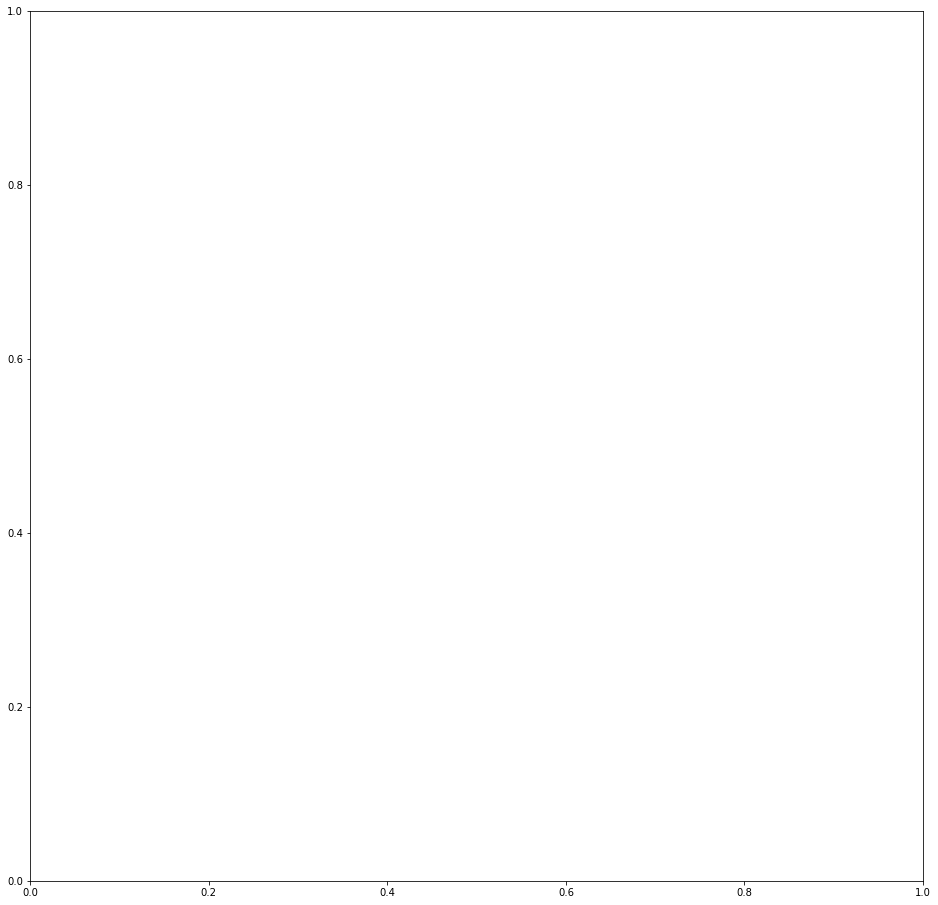

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(16,16))

In [28]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_3 = sns.heatmap(sub_2.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

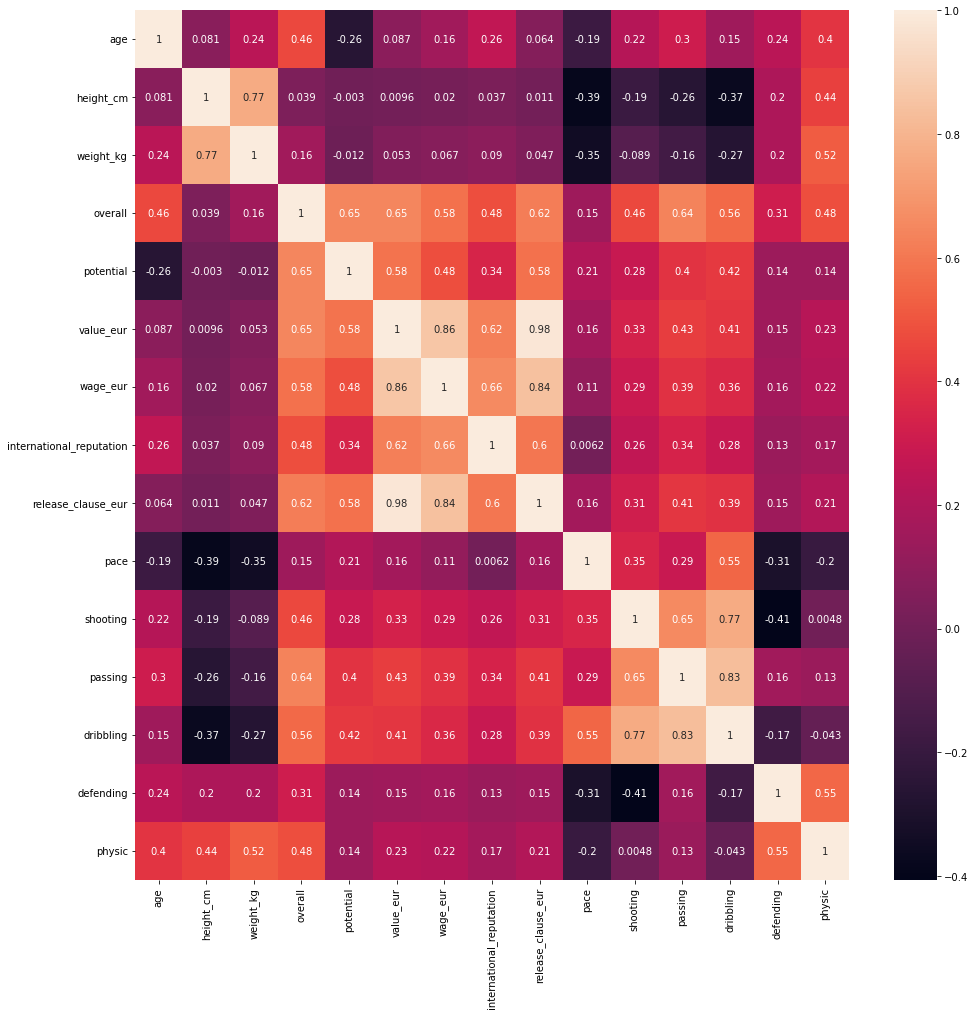

In [29]:
corr_3.figure

In [48]:
corr_4 = sub_2.corr()

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'height_cm'),
 Text(2.5, 0, 'weight_kg'),
 Text(3.5, 0, 'overall'),
 Text(4.5, 0, 'potential'),
 Text(5.5, 0, 'value_eur'),
 Text(6.5, 0, 'wage_eur'),
 Text(7.5, 0, 'international_reputation'),
 Text(8.5, 0, 'release_clause_eur'),
 Text(9.5, 0, 'pace'),
 Text(10.5, 0, 'shooting'),
 Text(11.5, 0, 'passing'),
 Text(12.5, 0, 'dribbling'),
 Text(13.5, 0, 'defending'),
 Text(14.5, 0, 'physic')]

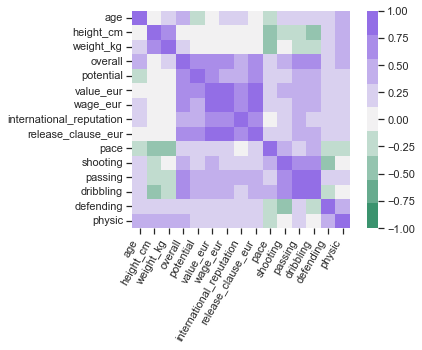

In [50]:
# Make seaborn heatmap for subset
ax = sns.heatmap(corr_4, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(150,275,s=80,l=55,n=9), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')

## Note - Are your eyes drawn immediately to the diagonal of 1s inside the graph? This is to be expected, since the heatmap takes every variable and crosses it with each and every other variable. This means you’ll have cases where a variable is crossed with itself, which, naturally, will show a perfect positive correlation, thus producing the diagonal of 1s. On the right side of the graph, you’ll see a legend indicating what the different colors mean. Purple equates to 0, or no relationship between the variables, dark purple and black equate to negative correlations, and orange and light orange equate to positive correlations

# 4. Creating Scatterplots

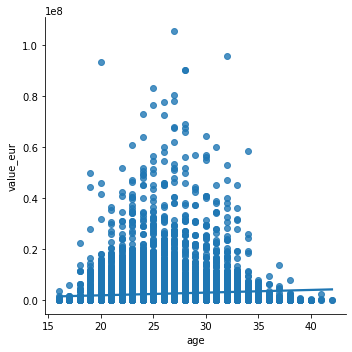

In [30]:
# Create a scatterplot for the "age" and "value_eur" columns in seaborn

sns.lmplot(x = 'age', y = 'value_eur', data = df_fifabal)

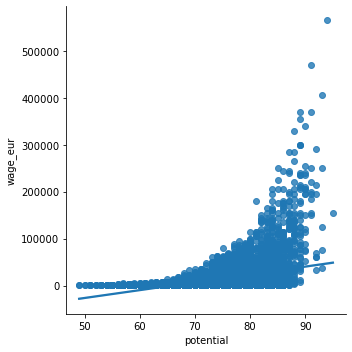

In [31]:
sns.lmplot(x = 'potential', y = 'wage_eur', data = df_fifabal)

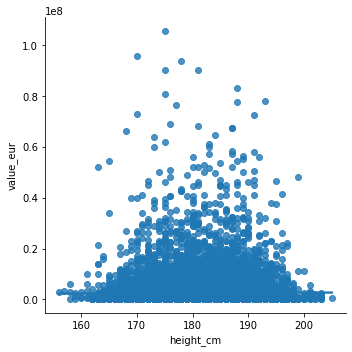

In [32]:
sns.lmplot(x = 'height_cm', y = 'value_eur', data = df_fifabal)

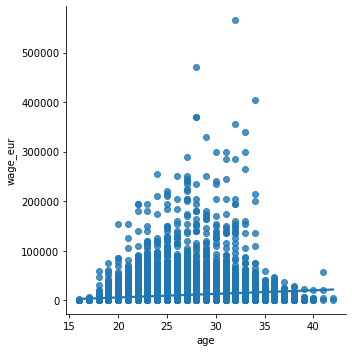

In [33]:
sns.lmplot(x = 'age', y = 'wage_eur', data = df_fifabal)

#### looking at this scatterplot, it actually does not look like a linear relationship

# 5. Pair Plots

In [34]:
# Keep only the variables you want to use in the pair plot

sub_3 =  sub_2[['age','potential','weight_kg','overall','value_eur','wage_eur']]

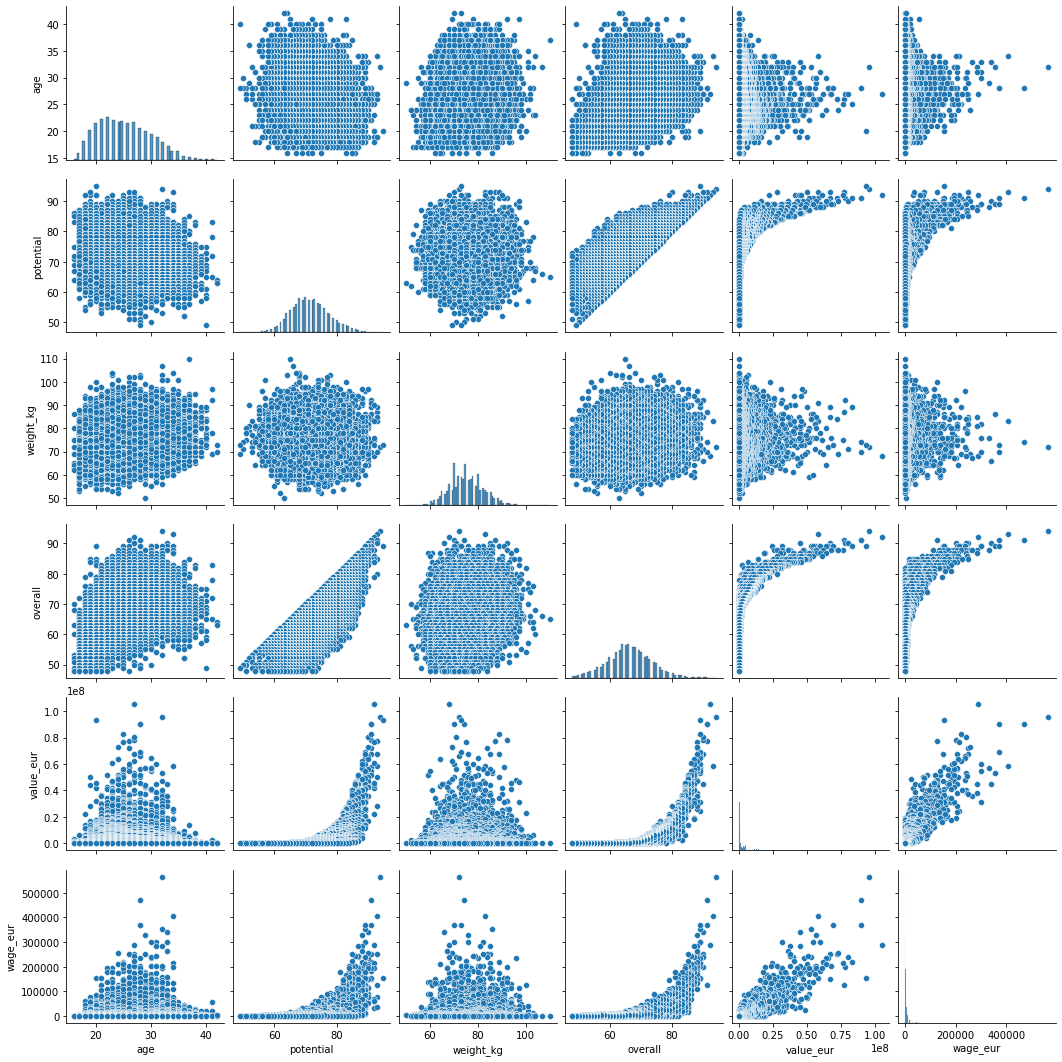

In [35]:
# Create a pair plot 

g = sns.pairplot(sub_3)

#### i will explore futher the age and value_eur  variable and other variables to see their impact and effect with the age

# 6. Categorical Plots

<AxesSubplot:xlabel='age', ylabel='Count'>

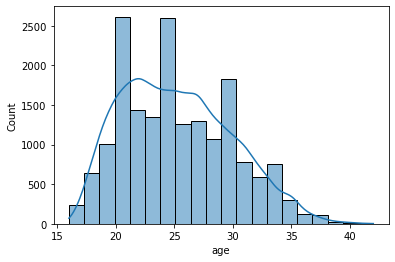

In [36]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the age ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_fifabal['age'], bins = 20, kde = True)

In [37]:
df_fifabal['age'].max()

42

In [38]:
df_fifabal['age'].min()

16

In [39]:
#Creating a categorical variable that splits the "age" column into categories
df_fifabal.loc[df_fifabal['age'] < 18, 'age_bracket'] = 'Teenage_player'

In [40]:
df_fifabal.loc[(df_fifabal['age'] >= 18) & (df_fifabal['age'] < 30), 'age_bracket'] = 'Middle_age_player'

In [41]:
df_fifabal.loc[df_fifabal['age'] >= 30, 'age_bracket'] = 'Old_player'

In [42]:
df_fifabal['age_bracket'].value_counts(dropna = False)

Middle_age_player    14241
Old_player            3556
Teenage_player         241
Name: age_bracket, dtype: int64

In [43]:
df_fifabal.shape

(18038, 34)

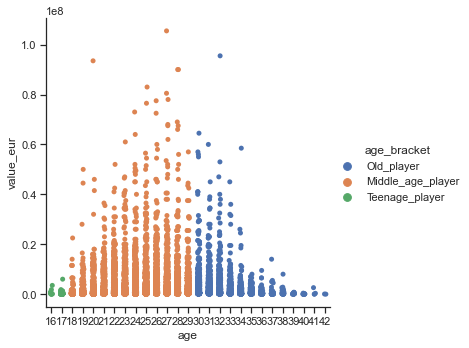

In [44]:
# Create a categorical plot in seaborn using the value_eur categories created above

sns.set(style="ticks")
g = sns.catplot(x="age", y="value_eur", hue="age_bracket", data=df_fifabal)

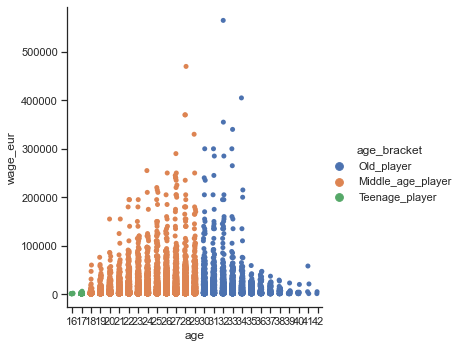

In [45]:
# Create a categorical plot in seaborn using the value_eur categories created above

sns.set(style="ticks")
g = sns.catplot(x="age", y="wage_eur", hue="age_bracket", data=df_fifabal)

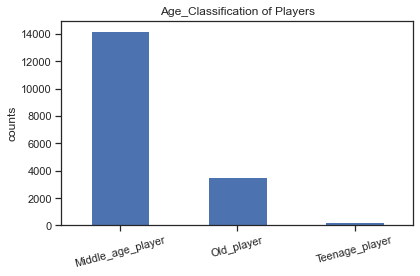

In [46]:
value_agegroup = df_fifabal['age_bracket'].value_counts().plot.bar(ylabel= 'counts', title = 'Age_Classification of Players')
plt.xticks(rotation= 15, horizontalalignment="center")
plt.tight_layout()

In [47]:
value_agegroup.figure.savefig(os.path.join(path, '02 Data','Prepared Data', 'agegroup_players.png')) 

# 7.  Hypotheses

1, if a player age decrease so does the wage decrease
2, if age increases so as the power_shot reduces
3, if age increases the price value decrease
4, if player overall rating is high so as the price value goes high 